## ANALISIS DE DATOS DE LLAMADA DE MESA DE SERVICIO ENTRE EL 17 Y EL 29 DE JULIO

### Objetivos

#### - Limpiar datos
#### - Graficar numero de llamados por dia
#### - Graficar consultas/areas mas frecuentes
#### - Graficar consultas/areas agrupadas por dia
#### - Realizar un modelo predictivo de llamadas/areas dada la fecha (maybe xd)

In [10]:
import numpy as np
import pandas as pd
import zipfile as zp
import os
import matplotlib.pyplot as plt
import seaborn as sns

#### Limpieza de datos

Importamos el csv con los datos a un DataFrame de pandas 

In [11]:
call_csv_route = os.path.join("res","exporte_tickets_17al29.csv")
call_df = pd.read_csv(call_csv_route, engine="python", header=0, delimiter=";")

call_df.sample(5)

,FECHA_CREACION,CARRERA,NIVEL_1,NIVEL_2,NIVEL_3,NIVEL_4
1310,19-07-2023 17:51,INGENIERÍA EN INFORMÁTICA,Académico,Admisión especial interna,Reincorporación a la carrera,Resuelto
1110,22-07-2023 12:12,GASTRONOMÍA INTERNACIONAL,Información general,Información general,Información sede,Resuelto
1058,24-07-2023 12:08,GASTRONOMÍA INTERNACIONAL,Financiamiento,Pagos y Deudas,Firma electrónica consentimiento deuda,Resuelto
642,26-07-2023 12:47,INGENIERÍA EN INFORMÁTICA,Tecnología,Gestión de cuentas,Cuenta alumno continuidad,Derivación G-Desk
962,24-07-2023 19:31,ADMINISTRACIÓN DE EMPRESAS M/LOGÍSTICA,Financiamiento,Pagos y Deudas,Pago en línea,Resuelto


Eliminamos las columnas identificadores y que no son necesarias para el analisis.

In [12]:
call_df.columns

Index(['FECHA_CREACION', 'CARRERA', 'NIVEL_1', 'NIVEL_2', 'NIVEL_3',
       'NIVEL_4'],
      dtype='object')

In [13]:
"""drop_columns = ['ID_ATENCION', 'RUT_CLIENTE', 'NOMBRE_CLIENTE', 'USUARIO_CREACION', 'USUARIO_ASIG', 'ESTADO_ATENCION', 
                'AREA', 'SEDE', 'ESFUERZO', 'TIEMPO_RESOLUCION', 'OBSERVACION', 'OBSERVACION_CLIENTE']

call_df.drop(drop_columns, axis=1, inplace=True)
call_df"""

"drop_columns = ['ID_ATENCION', 'RUT_CLIENTE', 'NOMBRE_CLIENTE', 'USUARIO_CREACION', 'USUARIO_ASIG', 'ESTADO_ATENCION', \n                'AREA', 'SEDE', 'ESFUERZO', 'TIEMPO_RESOLUCION', 'OBSERVACION', 'OBSERVACION_CLIENTE']\n\ncall_df.drop(drop_columns, axis=1, inplace=True)\ncall_df"

In [16]:
call_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   FECHA_CREACION  1565 non-null   object
 1   CARRERA         1552 non-null   object
 2   NIVEL_1         1565 non-null   object
 3   NIVEL_2         1565 non-null   object
 4   NIVEL_3         1565 non-null   object
 5   NIVEL_4         1565 non-null   object
dtypes: object(6)
memory usage: 73.5+ KB


Se eliminara la columna "NIVEL_5" porque esta vacia

Cambiamos el tipo de datos de la columna "FECHA_CREACION" de object a datetime

In [17]:
call_df["FECHA_CREACION"] = pd.to_datetime(call_df["FECHA_CREACION"], dayfirst=True)

call_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FECHA_CREACION  1565 non-null   datetime64[ns]
 1   CARRERA         1552 non-null   object        
 2   NIVEL_1         1565 non-null   object        
 3   NIVEL_2         1565 non-null   object        
 4   NIVEL_3         1565 non-null   object        
 5   NIVEL_4         1565 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 73.5+ KB


In [18]:
call_df.sample(5)

,FECHA_CREACION,CARRERA,NIVEL_1,NIVEL_2,NIVEL_3,NIVEL_4
93,2023-07-28 14:02:00,TURISMO Y HOTELERÍA,Inscripción de asign,Oferta académica,Asignatura no disponible,Resuelto
686,2023-07-26 12:31:00,INGENIERÍA EN CONECTIVIDAD Y REDES,Inscripción de asign,Información del proceso,Modificación de carga,Resuelto
574,2023-07-26 13:12:00,INGENIERÍA EN MARKETING DIGITAL,Inscripción de asign,Información del proceso,Modificación de carga,Resuelto
822,2023-07-26 10:09:00,INGENIERÍA EN MARKETING DIGITAL,Tecnología,Plataformas Alumnos,SAP NetWork IA,Resuelto
1354,2023-07-19 13:41:00,INGENIERÍA EN INFORMÁTICA,Tecnología,Plataformas Alumnos,Gestión prácticas,Resuelto


Rellenamos los datos NaN que quedan en carrera con "Sin Informacion"

In [19]:
call_df["CARRERA"] = call_df["CARRERA"].fillna("Sin Informacion")

call_df.sample(5)

,FECHA_CREACION,CARRERA,NIVEL_1,NIVEL_2,NIVEL_3,NIVEL_4
1534,2023-07-17 13:10:00,ADMINISTRACIÓN DE EMPRESAS MENCIÓN MARKETING,Titulado,Información y gestión,Otras consultas,Resuelto
1143,2023-07-21 15:36:00,INGENIERÍA EN INFORMÁTICA,Académico,Admisión especial interna,Reincorporación a la carrera,Resuelto
181,2023-07-28 09:55:00,TÉCNICO EN ADMINISTRACIÓN,Tecnología,Gestión de cuentas,Cuenta alumno continuidad,Resuelto
52,2023-07-28 16:32:00,INGENIERÍA EN COMERCIO EXTERIOR,Inscripción de asign,Oferta académica,Asignatura no disponible,Resuelto
642,2023-07-26 12:47:00,INGENIERÍA EN INFORMÁTICA,Tecnología,Gestión de cuentas,Cuenta alumno continuidad,Derivación G-Desk


In [20]:
call_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FECHA_CREACION  1565 non-null   datetime64[ns]
 1   CARRERA         1565 non-null   object        
 2   NIVEL_1         1565 non-null   object        
 3   NIVEL_2         1565 non-null   object        
 4   NIVEL_3         1565 non-null   object        
 5   NIVEL_4         1565 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 73.5+ KB


#### Grafico numero de llamados por dia

In [21]:
calls_per_day = call_df.groupby([call_df['FECHA_CREACION'].dt.date]).size().reset_index(name='N° Llamados')
calls_per_day

,FECHA_CREACION,N° Llamados
0,2023-07-17,70
1,2023-07-18,79
2,2023-07-19,124
3,2023-07-20,104
4,2023-07-21,72
5,2023-07-22,13
6,2023-07-24,144
7,2023-07-25,107
8,2023-07-26,554
9,2023-07-27,109


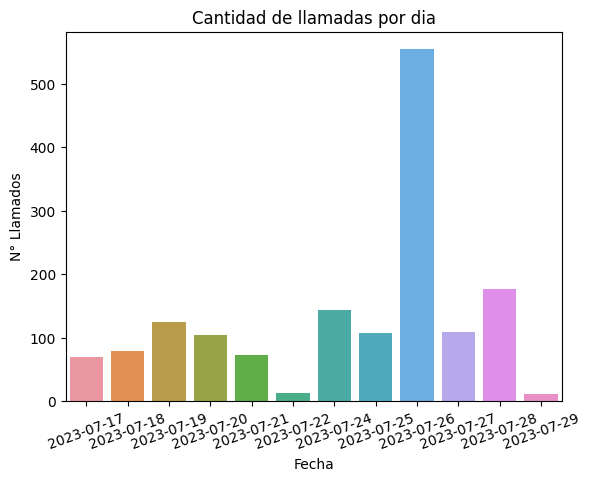

<Figure size 1000x900 with 0 Axes>

In [52]:
calls_per_day_data = calls_per_day.copy()

calls_plot = sns.barplot(x='FECHA_CREACION', y='N° Llamados',data=calls_per_day_data)
calls_plot.set_title("Cantidad de llamadas por dia")
calls_plot.set_xlabel("Fecha")
plt.xticks(rotation=20)
plt.figure(figsize = (10,9))

calls_plot.figure.savefig("calls_per_day.png", dpi=300)
plt.show()

#### Grafico consultas/areas mas frecuentes

In [24]:
carrers_data = call_df.groupby(call_df['CARRERA']).size().reset_index(name='N° Llamados por Carrera')
carrers_data = carrers_data.sort_values(['N° Llamados por Carrera'], ascending=False)
carrers_data.head()

,CARRERA,N° Llamados por Carrera
32,INGENIERÍA EN INFORMÁTICA,246
14,GASTRONOMÍA INTERNACIONAL,221
29,INGENIERÍA EN COMERCIO EXTERIOR,162
44,TURISMO Y HOTELERÍA,119
13,ECOTURISMO,80


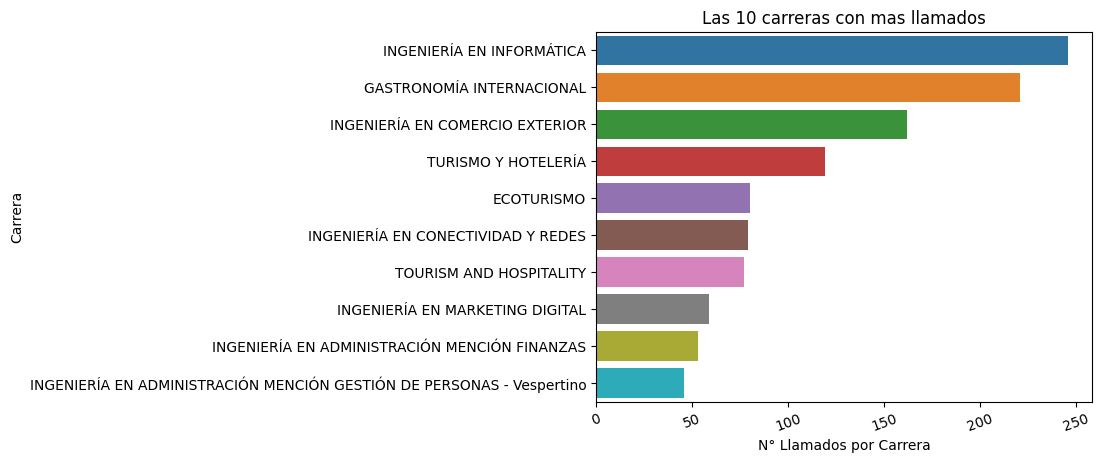

<Figure size 1200x900 with 0 Axes>

In [66]:
carrers_plot = sns.barplot(y='CARRERA', x='N° Llamados por Carrera',data=carrers_data.head(10))
carrers_plot.set_title("Las 10 carreras con mas llamados")
carrers_plot.set_ylabel("Carrera")
plt.xticks(rotation=20)
plt.figure(figsize = (12,9))

carrers_plot.figure.savefig("carrers_calls.png", dpi=300, bbox_inches='tight')
plt.show()

In [29]:
level_1 = call_df.groupby(call_df['NIVEL_1']).size().reset_index(name='N° Llamados')
level_1.head()

,NIVEL_1,N° Llamados
0,Académico,390
1,Financiamiento,279
2,Fuera de alcance,104
3,Gestión de abandono,3
4,Información general,92


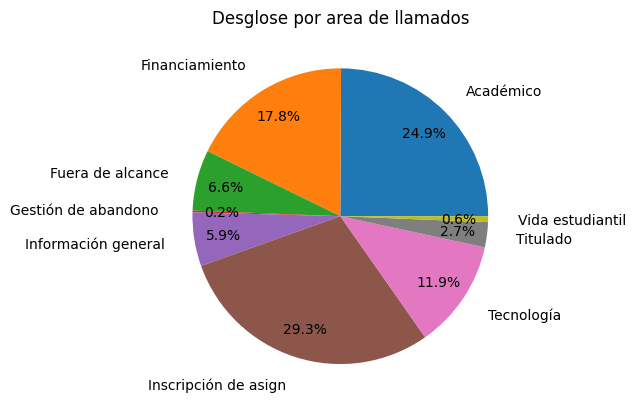

<Figure size 1000x900 with 0 Axes>

In [64]:
fig, ax = plt.subplots()

ax.pie(level_1["N° Llamados"], labels=level_1["NIVEL_1"], autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.2)

plt.title("Desglose por area de llamados")
plt.figure(figsize = (10,9))
fig.savefig("calls_per_area.png", dpi=300, bbox_inches='tight')

plt.show()

#### Graficar consultas/areas agrupadas por dia

In [74]:
grouped_calls = call_df.groupby([call_df['FECHA_CREACION'].dt.date, "NIVEL_1"]).size().reset_index(name='N° Llamados')
grouped_calls

,FECHA_CREACION,NIVEL_1,N° Llamados
0,2023-07-17,Académico,30
1,2023-07-17,Financiamiento,22
2,2023-07-17,Fuera de alcance,4
3,2023-07-17,Información general,4
4,2023-07-17,Inscripción de asign,3
...,...,...,...
82,2023-07-28,Titulado,1
83,2023-07-28,Vida estudiantil,1
84,2023-07-29,Académico,3
85,2023-07-29,Fuera de alcance,1


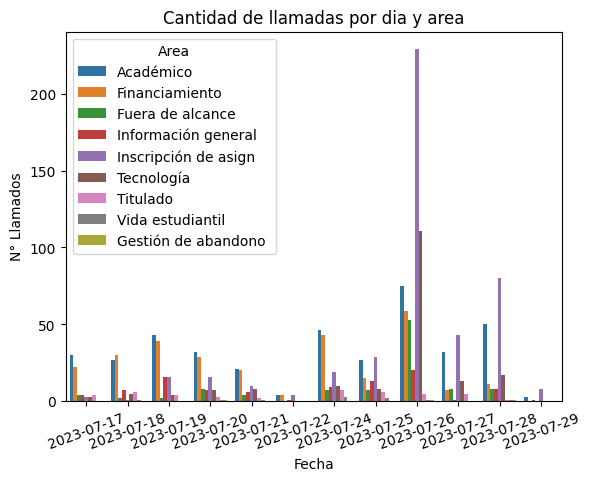

<Figure size 2000x2000 with 0 Axes>

In [82]:
grouped_calls_plot = sns.barplot(x='FECHA_CREACION', y='N° Llamados', data=grouped_calls, hue="NIVEL_1")
grouped_calls_plot.set_title("Cantidad de llamadas por dia y area")
grouped_calls_plot.set_xlabel("Fecha")
grouped_calls_plot.legend(title="Area")
plt.xticks(rotation=20)
plt.figure(figsize = (20,20))

grouped_calls_plot.figure.savefig("calls_per_day_area.png", dpi=600, bbox_inches='tight')
plt.show()